In [2]:
!rm df-*-checkpoint.csv

zsh:1: no matches found: df-*-checkpoint.csv


In [1]:
import os
import glob

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load all datasets

In [3]:
all_files = glob.glob("*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))
df = df.drop_duplicates()
print(df.shape)

(1512, 20)


In [4]:
df['Orchestrator'] = df['Orchestrator'].astype('category')
df['Benchmark'] = df['Benchmark'].astype('category')
df['Exp'] = df['Exp'].astype('category')
# df['Latency'] = df['Latency'].round(2)
df['Requests'] = df['Requests'].astype(int)

In [5]:
df_0 = df.loc[df['Exp'] == 'exp0']
df_1 = df.loc[df['Exp'] == 'exp1']
df_2 = df.loc[df['Exp'] == 'exp2']
df_3 = df.loc[df['Exp'] == 'exp3']
df_4 = df.loc[df['Exp'] == 'exp4']
df_5 = df.loc[df['Exp'] == 'exp5']
df_6 = df.loc[df['Exp'] == 'exp6']
df_7 = df.loc[df['Exp'] == 'exp7']
df_8 = df.loc[df['Exp'] == 'exp8']
df_9 = df.loc[df['Exp'] == 'exp9']
df_10 = df.loc[df['Exp'] == 'exp10']
df_11 = df.loc[df['Exp'] == 'exp11']

In [6]:
# Global settings
fontsize = 20
legend_location = "lower right"

# Exp3 multiclients

In [7]:
df_3.iloc[:,[0,1,2,5,6,10,11,12,-1]].head()

,Latency,Requests,Throughput,Orchestrator,Benchmark,Availability,Horizontal,Vertical,ReqSec
0,10.59,200,5931.0,swarm,hr,0,1,1,197.26
1,10.79,200,5891.0,swarm,hr,0,1,1,195.93
2,10.45,200,5960.0,swarm,hr,0,1,1,198.32
3,5.76,200,5957.0,swarm,mm,0,1,1,198.16
4,5.69,200,5933.0,swarm,mm,0,1,1,197.36


In [8]:
df_3.shape

(9, 20)

In [9]:
def barplot(df, labels, output="exp-barplot", fontsize=20):
    fig, ax = plt.subplots(figsize=(16,8))

    p1 = ax.bar(labels[0], df['Latency'][0], label=labels[0])
    p2 = ax.bar(labels[1], df['Latency'][1], label=labels[1])
    p3 = ax.bar(labels[2], df['Latency'][2], label=labels[2])
    ax.legend()

    # Label with label_type 'center' instead of the default 'edge'
    ax.bar_label(p1, label_type='edge', fontsize=fontsize)
    ax.bar_label(p2, label_type='edge', fontsize=fontsize)
    ax.bar_label(p3, label_type='edge', fontsize=fontsize)


    plt.ylim(0,15)
    # ax.grid()
    xticks = [int(tick) for tick in ax.get_xticks()]
    ax.set_xlabel('Benchmarks', fontsize=fontsize)
    ax.set_ylabel('Avg Tail Latency (milliseconds)', fontsize=fontsize+5)

    plt.yticks(fontsize=fontsize)
    plt.xticks(xticks, fontsize=fontsize)
    plt.legend(loc="upper right", fontsize=fontsize+5)

    plt.tight_layout()
    plt.savefig(f"Figures/{output}.png", bbox_inches='tight')

    plt.show()

In [10]:
labels = df_3['Benchmark'].unique()

In [11]:
df_3

,Latency,Requests,Throughput,Measured_Throughput,Baseline,Orchestrator,Benchmark,Infinite,Exp,N,Availability,Horizontal,Vertical,Threads,Connections,Duration,Mean,Max,StdDev,ReqSec
0,10.59,200,5931.0,3929,0,swarm,hr,0,exp3,NaN,0,1,1,8,512,30,3.383,12.400,2.240,197.26
1,10.79,200,5891.0,3927,0,swarm,hr,0,exp3,NaN,0,1,1,8,512,30,3.380,14.200,2.286,195.93
2,10.45,200,5960.0,3935,0,swarm,hr,0,exp3,NaN,0,1,1,8,512,30,3.347,13.144,2.236,198.32
3,5.76,200,5957.0,3933,0,swarm,mm,0,exp3,NaN,0,1,1,8,512,30,4.328,14.504,0.667,198.16
4,5.69,200,5933.0,3929,0,swarm,mm,0,exp3,NaN,0,1,1,8,512,30,4.353,48.704,1.179,197.36
5,5.71,200,5957.0,3933,0,swarm,mm,0,exp3,NaN,0,1,1,8,512,30,4.331,24.624,0.814,198.13
6,8.17,200,5931.0,3929,0,swarm,sn,0,exp3,NaN,0,1,1,8,512,30,2.471,10.136,1.622,197.26
7,7.52,200,5912.0,3927,0,swarm,sn,0,exp3,NaN,0,1,1,8,512,30,2.965,10.296,1.821,196.63
8,7.54,200,5934.0,3927,0,swarm,sn,0,exp3,NaN,0,1,1,8,512,30,3.297,27.840,1.911,197.50


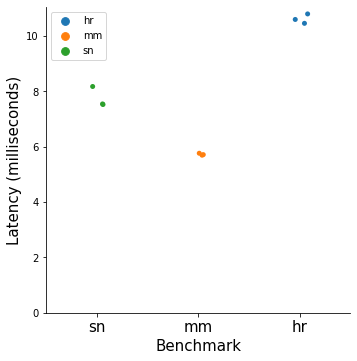

In [12]:
# fig, ax = plt.subplots(figsize=(16,8))
ax = sns.catplot(x="Benchmark", y="Latency", data=df_3, order=["sn","mm","hr"], hue="Benchmark")
ax.set_ylabels("Latency (milliseconds)",fontsize=15)
ax.set_xlabels(fontsize=15)
# yticks = [int(tick) for tick in ax.get_yticks()]

ax.set_xticklabels(fontsize=15)
# ax.set_yticklabels(yticks, fontsize=fontsize)
# ax.set_ylim(left=0)
plt.ylim(0)
# ax.axes[0][0].legend(fontsize=15)
plt.legend()

In [13]:
df_3

,Latency,Requests,Throughput,Measured_Throughput,Baseline,Orchestrator,Benchmark,Infinite,Exp,N,Availability,Horizontal,Vertical,Threads,Connections,Duration,Mean,Max,StdDev,ReqSec
0,10.59,200,5931.0,3929,0,swarm,hr,0,exp3,NaN,0,1,1,8,512,30,3.383,12.400,2.240,197.26
1,10.79,200,5891.0,3927,0,swarm,hr,0,exp3,NaN,0,1,1,8,512,30,3.380,14.200,2.286,195.93
2,10.45,200,5960.0,3935,0,swarm,hr,0,exp3,NaN,0,1,1,8,512,30,3.347,13.144,2.236,198.32
3,5.76,200,5957.0,3933,0,swarm,mm,0,exp3,NaN,0,1,1,8,512,30,4.328,14.504,0.667,198.16
4,5.69,200,5933.0,3929,0,swarm,mm,0,exp3,NaN,0,1,1,8,512,30,4.353,48.704,1.179,197.36
5,5.71,200,5957.0,3933,0,swarm,mm,0,exp3,NaN,0,1,1,8,512,30,4.331,24.624,0.814,198.13
6,8.17,200,5931.0,3929,0,swarm,sn,0,exp3,NaN,0,1,1,8,512,30,2.471,10.136,1.622,197.26
7,7.52,200,5912.0,3927,0,swarm,sn,0,exp3,NaN,0,1,1,8,512,30,2.965,10.296,1.821,196.63
8,7.54,200,5934.0,3927,0,swarm,sn,0,exp3,NaN,0,1,1,8,512,30,3.297,27.840,1.911,197.50


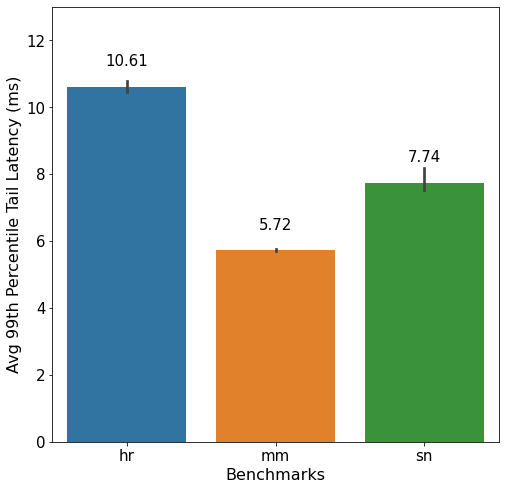

In [20]:
fig, ax = plt.subplots(figsize=(8,8))
labels = ["sn", "mm", "hr"]

ax = sns.barplot(x='Benchmark', y='Latency', data=df_3, order=["hr", "mm", "sn"])
ax.bar_label(ax.containers[0], label_type='edge', padding=18, fmt='%.2f',fontsize=15)
# ax.legend()


# set axis and legend
ax.set_xlabel('Benchmarks', fontsize=16)
ax.set_ylabel('Avg 99th Percentile Tail Latency (ms)', fontsize=16)
# ax.set_title('Throughput versus Requests', fontsize=fontsize)

xticks = [int(tick) for tick in ax.get_xticks()]
plt.yticks(fontsize=15)
plt.xticks(xticks, fontsize=15)
plt.ylim(0,13)
plt.savefig("Figures/exp3-multiclients.png", bbox_inches='tight')